In [1]:
import numpy as np
import pandas as pd
import pyodbc
import sqlalchemy
import sqlite3
from subprocess import check_output
import os
from IPython.core.display import Image, display

from sqlalchemy import create_engine
engine = create_engine('sqlite:////...', echo=False)

## 1. What's in the database?
For example,
#### Database `client` 

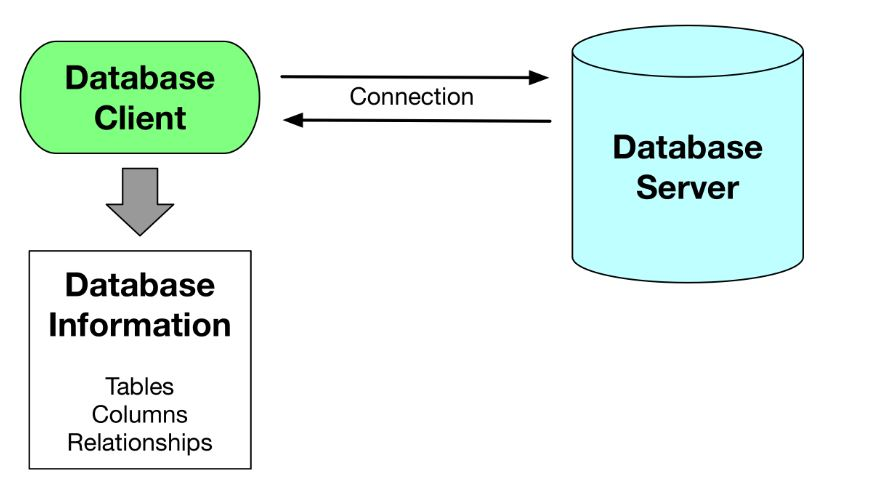

In [2]:
####

There are `table`, `columns`, `diagram`, `relationships`, `etc`... in a `database`. 

$\qquad \diamond$ For example; the `stackoverflow` contains the questions asked on [Stack Overflow](https://stackoverflow.com/) with `certain tags`.

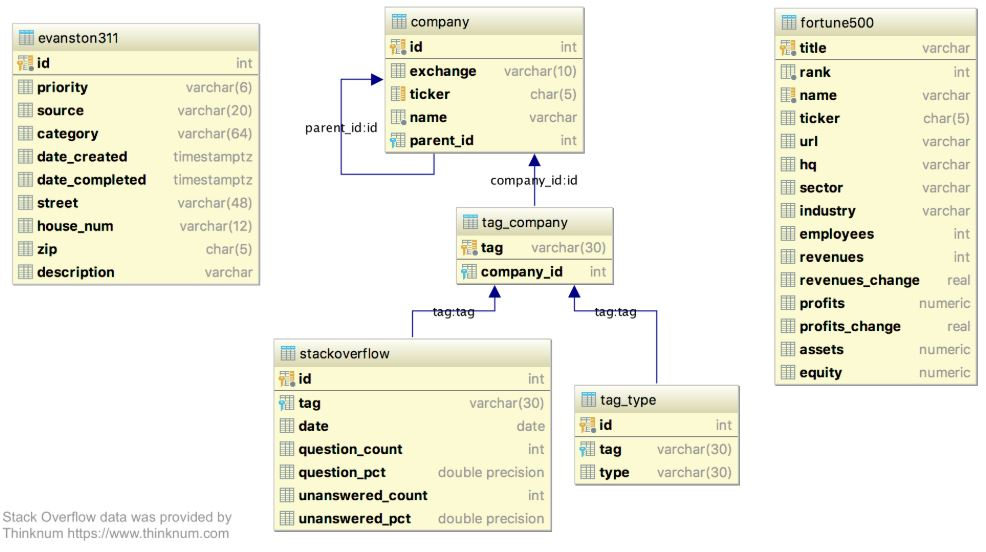

In [3]:
## Each table contain the specific columns 

$\qquad \diamond$ For instance, if we take the first 5 rows in the `company` table.

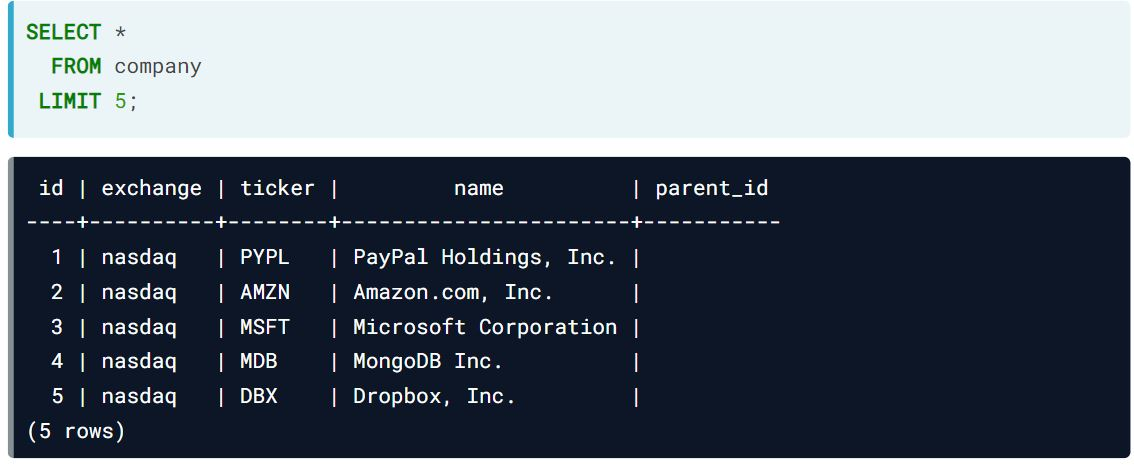

In [4]:
####

#### A few `reminders`

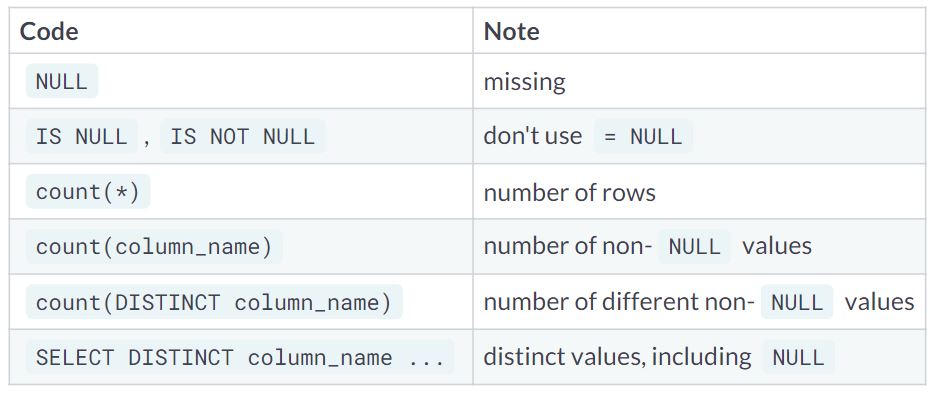

In [5]:
####

### EXERCISEs.
#### Exercise 1.1. Explore table sizes
Let's start by exploring five related tables:

- `stackoverflow`: questions asked on [Stack Overflow]() with certain tags
- `company`: information on companies related to tags in `stackoverflow`
- `tag_company`: links `stackoverflow` to `company`
- `tag_type`: type categories applied to tags in `stackoverflow`
- `fortune500`: information on top US companies

Count the number of rows in a table with

                SELECT count(*) 
                  FROM tablename;
Count the number of columns in a table by selecting a `few rows` and manually `counting the columns` in the result.

**Question.** Which `table` has the **most rows**? Which `table` has the **most columns**?

- A. `stackoverflow` has the most rows; `company` has the most columns.
- B. `tag_company` has the most rows; `company` has the most columns.
- C. `stackoverflow` has the most rows; `fortune500` has the most columns.
- D. `tag_type` has the most rows; `fortune500` has the most columns.

**Answers & comments.**

$\diamond$ Look at the following command and it results before answer this question.

$\qquad \blacksquare$ **`Count the rows of all tables in the Answers`**

                SELECT '#rows_in_company' AS id, COUNT(*) FROM company
                UNION
                SELECT '#rows_in_stackovf' AS id, COUNT(*) FROM stackoverflow
                UNION
                SELECT '#rows_in_tagtype' AS id, COUNT(*) FROM tag_type
- **`result`.**

id|count
:-|:-:
`#rows_in_stackovf`|45238
`#rows_in_tagtype`|61
`#rows_in_company`|14             

$\qquad \blacksquare$ **`Count the columns`**

                SELECT 'company' AS tab_name, COUNT(*) AS count_col
                FROM(SELECT * FROM information_schema.columns
                              WHERE table_name = 'company') AS tab1
                UNION
                SELECT 'fortune500' AS tab_name, COUNT(*) AS count_col
                FROM(SELECT * FROM information_schema.columns
                              WHERE table_name = 'fortune500') AS tab2

- **`result`.**

tab_name|count_col
:-|:-:
`company`|5
`fortune500`|15

$\diamond$ Look at these results, they indicated that the option **`C` is correct!!**  

$\diamond$ `Knowing how much data you have` is a **first step** in `exploratory data analysis`.

#### Exercise 1.2. Count missing values
$\qquad$ Which column of `fortune500` has the `most missing values`? 

$\qquad$ To find out, you'll need to check `each column individually`, although here we'll check just three.

**`Course Note`**: While you're unlikely to encounter this issue during this exercise, note that if you run a `query` that takes more than a few seconds to `execute`, your session may expire or you may be disconnected from the server. You will not have this issue with any of the exercise solutions, so if your session expires or disconnects, there's an error with your `query`.

#### Instructions
**Step 1.** First, figure out how many `rows` are in `fortune500` by counting them.

**SOLUTION.**

                    -- Select the count of the number of rows
                    SELECT COUNT(*) FROM fortune500;
- **`query result`.**

| count |
|:-:|
| 500 |

**Step 2.** Subtract the count of the `non-NULL` ticker values from the total number of rows; alias the difference as `missing`.

**SOLUTION.**

                    -- Select the count of ticker; subtract from the total number of rows,
                    SELECT COUNT(*) - COUNT(DISTINCT ticker) AS missing 
                    FROM fortune500;
- **`query result`.**

| missing |
|:-:|
| 32 |

**Step 3.** Repeat for the `profits_change` column.

**SOLUTION.**

                    SELECT COUNT(*) - COUNT(profits_change) AS missing
                    FROM fortune500
- **`query result`.**

| missing |
|:-:|
| 63 |

**Step 4.** Repeat for the `industry column`.

**SOLUTION.**

                    SELECT COUNT(*) - COUNT(industry) AS missing
                    FROM fortune500
- **`query result`.**

| missing |
|:-:|
| 13 |

- **Comments.** Note  that the result of a call to `count(*)` is labelled count in the result. You can refer to this column with count in `ORDER BY clauses` without explicitly aliasing `count(*)` `AS` count.

#### Exercise 1.3. Join tables
$\qquad$ Part of `exploring a database` is figuring out how tables relate to each other. The `company` and `fortune500` tables don't have a formal relationship between them in the `database`, but this doesn't prevent you from joining them.

$\qquad$ To join the tables, you need to find a column that they have in common where the values are consistent across the tables. 

**`Remember`**: just because two tables have `a column` with the `same name`, it **doesn't mean those columns necessarily contain compatible data**. If you find more than one pair of columns with similar data, you may need to try joining with each in turn to see if you get the same number of results.

Reference the entity `relationship diagram` if needed.

#### Instructions
- Look at the contents of the `company` and `fortune500` tables. Find a column that they have in `common` where the `values` for each company are `the same in both tables`.
- Join the `company` and `fortune500` tables with an `INNER JOIN`.
- Select only `company.name` for companies that appear in both tables.

**SOLUTION.**

                    SELECT company.name 
                    FROM company
                        INNER JOIN fortune500
                           ON company.ticker = fortune500.ticker;
- **`query result`.**

|name
|:-
|Apple Incorporated
|Amazon.com Inc
|Alphabet
|Microsoft Corp.
|International Business Machines Corporation
|PayPal Holdings Incorporated
|eBay, Inc.
|Adobe Systems Incorporated

- **Comments.** We can join tables when they share a column with consistent data values.

## 2. The `keys` to the database.

### The `FK (foreign key)s`
$\diamond$ Reference another `row`:
- In a `different table` or `the same table`
- Via a `unique ID`

$\qquad$ `>>` The `Primary key` columns contains `unique, NOT NULL` values.

- Value restricted to values in referenced `column` `OR` `null`.

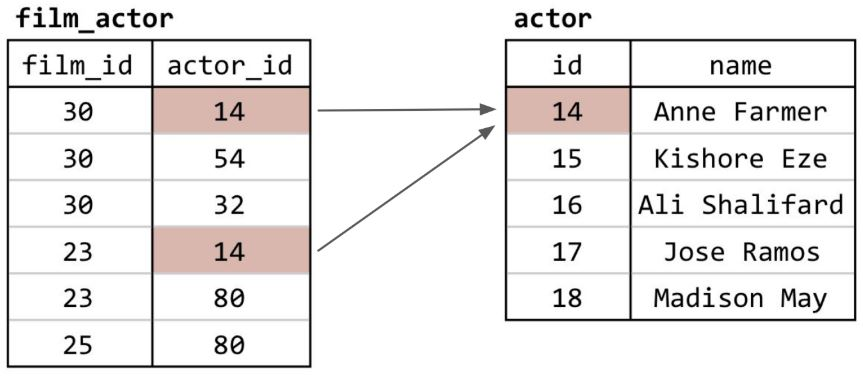

In [6]:
####

For example, in the image below; 
- the `company_id` column is the child of the `company` table; is referenced from the `tag_company` table
- the `parent_id` column in the `company` table reference its from the `company` table.

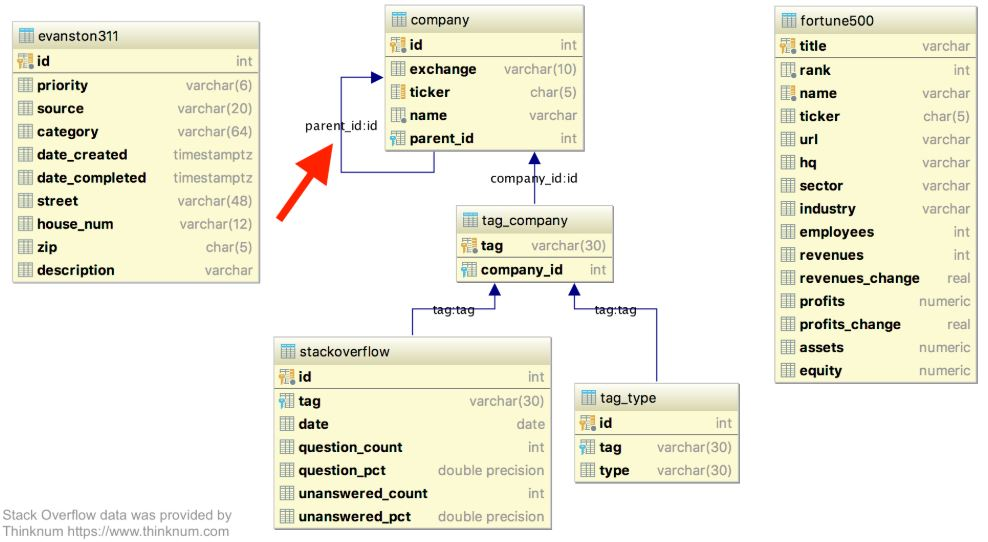

In [7]:
####

#### Which is the `Primary key` in each `table`?

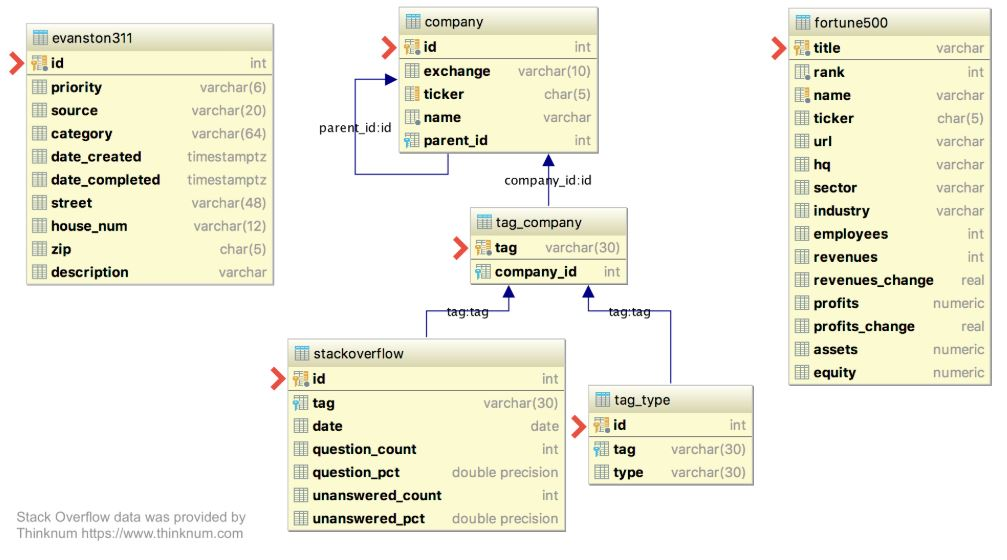

In [8]:
####

### `Coalesce` function.
$\diamond$ **`Syntax`.**

                        coalesce(value_1, value_2 [, ...] )
$\diamond$ **`Features`**
- Operates `row by row`.
- Returns `first NON-NULL` values.

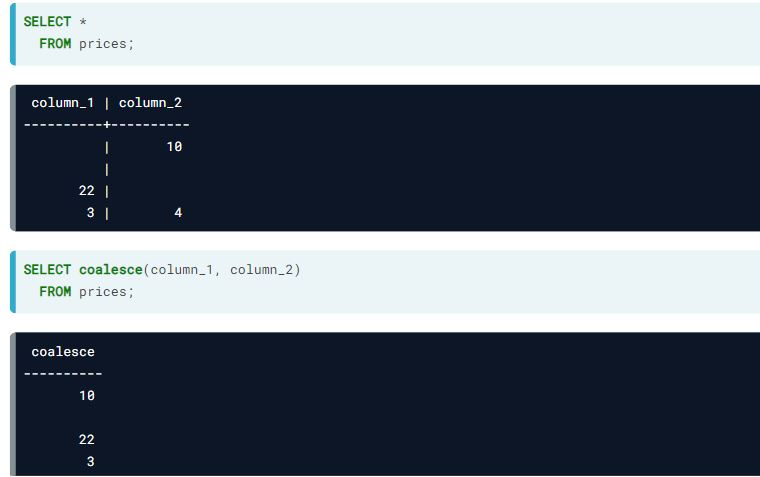

In [9]:
#### Example - illustration

### EXERCISEs
#### Exercise 2.1. Foreign keys
Recall that foreign keys reference another row in the database via a `unique ID`. Values in a foreign key column are restricted to values in the `referenced column` `OR NULL`.

Using what you know about `foreign keys`, why can't the tag column in the `tag_type` table be a `foreign key` that references the `tag` column in the `stackoverflow` table?

**`Remember`**, you can reference the slides using the icon in the upper right of the screen to review the requirements for a `foreign key`.

- A. `stackoverflow.tag` is not a `primary key`
- B. `tag_type.tag` contains `NULL` values.
- C. `stackoverflow.tag` contains duplicate values.
- D. `tag_type.tag` does not contain all the values in `stackoverflow.tag`.

**Answers & comments.**

$\diamond$ First, look at the following `command`,

                SELECT 'stackoverflow' AS tab_name, COUNT(*) - COUNT(tag) AS count_null,
                        COUNT(*) - COUNT(DISTINCT tag) AS count_duplicates,
                        COUNT(DISTINCT tag) AS count_distinct
                        FROM stackoverflow
                UNION
                SELECT 'tag_type' AS tab_name, COUNT(*) - COUNT(tag) AS count_null,
                        COUNT(*) - COUNT(DISTINCT tag) AS count_duplicates,
                        COUNT(DISTINCT tag) AS count_distinct
                        FROM tag_type
**`result`.**

tab_name|count_null | count_duplicates | count_distinct | 
:-|:-:|:-:|:-:
`stackoverflow`| 0 | 45185 | 53 
`tag_type`| 0 | 11 | 51 

$\Rightarrow$ Hence, the options `B` and `D` are *incorrect* but **`C`** is **correct**!! Indeed,

$\qquad \bullet$ Look at the `count_null` column in the `query_result`; then both `stackoverflow.tag` and `tag_type.tag` doesn't contain any `NULL` values; so `B` is wrong!

$\qquad \bullet$ Likewise, in the `count_duplicates` column, indicates that option `C` is correct!!

$\qquad \bullet$ Moreover, the number of `unique` values in the column `stackoverflow.tag` is greater than in the `tag_type.tag` hence `tag_type.tag` can not contains all `unique values` in `stackoverflow.tag`.

$\diamond$ `Foreign keys` often `reference` `primary keys`, but **it isn't a requirement**; so *`A`* is not correct!!

#### Exercise 2.2. Read an entity `relationship diagram`
$\qquad$ The information you need is sometimes split across multiple tables in the database.

$\qquad$ What is the most common `stackoverflow` `tag_type`? What `companies` have a `tag` of that `type`?

$\qquad$ To generate a list of such `companies`, you'll need to join three tables together.

$\qquad$ Reference the entity `relationship diagram` as needed when determining which columns to use when joining tables.

#### Instructions
**Step 1.**
- First, using the `tag_type` table, count the number of `tags` with each type.
- `Order` the results to find the `most common tag type`.

**SOLUTION.**

                -- Count the number of tags with each type
                SELECT type, COUNT(*) AS count
                      FROM tag_type
                GROUP BY type            -- To get the count for each type, what do you need to do?
                ORDER BY count DESC;     -- Order the results with the most common
**`query result`.**

type|count
:-|:-:
cloud|31
database|6
payment|5
mobile-os|4
api|4
company|4
storage|2
os|2
spreadsheet|2
identity|1

**Step 2.** 
- `Join` the `tag_company`, `company`, and `tag_type` tables, keeping only `mutually` occurring records.
- Select `company.name`, `tag_type.tag`, and `tag_type.type` for `tags` with the `most common type` from the previous step.

**SOLUTION.**

                    -- Select the 3 columns desired
                    SELECT company.name, tag_type.tag, tag_type.type
                      FROM company
                           -- Join to the tag_company table
                           INNER JOIN tag_company 
                               ON company.id = tag_company.company_id
                           -- Join to the tag_type table
                           INNER JOIN tag_type
                               ON tag_company.tag = tag_type.tag
                      -- Filter to most common type
                      WHERE type='cloud';

**`query result`.**

name|tag|type
:-|:-|:-
Amazon Web Services|amazon-cloudformation|cloud
Amazon Web Services|amazon-cloudfront|cloud
Amazon Web Services|amazon-cloudsearch|cloud
Amazon Web Services|amazon-cloudwatch|cloud
Amazon Web Services|amazon-cognito|cloud
Amazon Web Services|amazon-data-pipeline|cloud
Amazon Web Services|amazon-dynamodb|cloud
Amazon Web Services|amazon-ebs|cloud
Amazon Web Services|amazon-ec2|cloud
Amazon Web Services|amazon-ecs|cloud
Amazon Web Services|amazon-elastic-beanstalk|cloud
Amazon Web Services|amazon-elasticache|cloud
Amazon Web Services|amazon-elb|cloud
Amazon Web Services|amazon-emr|cloud
Amazon Web Services|amazon-glacier|cloud
Amazon Web Services|amazon-kinesis|cloud
Amazon Web Services|amazon-lambda|cloud
Amazon Web Services|amazon-rds-aurora|cloud
Amazon Web Services|amazon-rds|cloud
Amazon Web Services|amazon-redshift|cloud
Amazon Web Services|amazon-route53|cloud
Amazon Web Services|amazon-s3|cloud
Amazon Web Services|amazon-ses|cloud
Amazon Web Services|amazon-simpledb|cloud
Amazon Web Services|amazon-sns|cloud
Amazon Web Services|amazon-sqs|cloud
Amazon Web Services|amazon-swf|cloud
Amazon Web Services|amazon-vpc|cloud
Amazon Web Services|amazon-web-services|cloud
Microsoft Corp.|azure|cloud
Dropbox|dropbox|cloud

**Comments.** You could combine these steps in a `single query` by using a `subquery` in the `WHERE clause` instead of the value `'cloud'`.

#### Exercise 2.3. Coalesce
$\qquad$ The `coalesce()` function can be useful for specifying a default or backup value when a column contains `NULL` values.

$\qquad$ `coalesce()` checks arguments in order and returns the first `non-NULL` value, if one exists.

                    coalesce(NULL, 1, 2) = 1
                    coalesce(NULL, NULL) = NULL
                    coalesce(2, 3, NULL) = 2
In the `fortune500` data, `industry` contains some missing values. Use `coalesce()` to use the value of `sector` as the `industry` when `industry` is `NULL`. Then **find the `most common industry`**.

#### Instructions
- Use `coalesce()` to select the `first non-NULL` value from `industry`, `sector`, or `'Unknown'` as a fallback value.
- Alias the result of the call to `coalesce()` as `industry2`.
- Count the number of rows with each `industry2` value.
- Find the most common value of `industry2`.

**SOLUTION.**

                    SELECT coalesce(industry, sector, 'Unknown') AS industry2,
                           count(*) 
                    FROM fortune500 
                    GROUP BY industry2
                    ORDER BY count DESC
                    LIMIT 1;

- **`query result`.**

industry2|count
:-|:-:
`Utilities: Gas and Electric`|22

- **Comments** Terrific! `coalesce` is essential when the value you need could be in **`more than one column`**. In the next exercise, you'll use `coalesce` as part of a `self join`.

#### Exercise 2.4. Coalesce with a self-join
$\qquad$ You previously joined the `company` and `fortune500` tables to find out which `companies` are in both tables. Now, also include `companies` from `company` that are `subsidiaries` of `Fortune 500 companies` as well.

$\qquad$ To include `subsidiaries`, you will need to `join` `company` to itself to associate a subsidiary with its parent company's information. To do this self-join, use two different aliases for `company`.

`coalesce` will help you combine the two `ticker` columns in the result of the `self-join` to `join` to `fortune500`.

#### Instructions.
- Join `company` to itself to add information about a `company's parent` to the original company's information.
- Use `coalesce` to get the parent company `ticker` if available and the original company `ticker` otherwise.
- `INNER JOIN` to `fortune500` using the `ticker`.
- Select original `company` `name`, `fortune500` `title` and `rank`.

**SOLUTION.**

                SELECT company_original.name, title, RANK
                    -- Start with original company information
                    FROM company AS company_original
                       -- Join to another copy of company with parent
                       -- company information
                       LEFT JOIN company AS company_parent
                            ON company_original.parent_id = company_parent.id 
                       -- Join to fortune500, only keep rows that match
                       INNER JOIN fortune500 
                       -- Use parent ticker if there is one, 
                       -- otherwise original ticker
                       ON coalesce(company_original.ticker, 
                                   company_parent.ticker) = 
                             fortune500.ticker
                 -- For clarity, order by rank
                 ORDER BY rank; 
- **`query result`.**

name|title|rank
:-|:-|:-:
Apple Incorporated|Apple|3
Amazon.com Inc|Amazon.com|12
Amazon Web Services|Amazon.com|12
Alphabet|Alphabet|27
Google LLC|Alphabet|27
Microsoft Corp.|Microsoft|28
International Business Machines Corporation|IBM|32
PayPal Holdings Incorporated|PayPal Holdings|264
eBay, Inc.|eBay|310
Adobe Systems Incorporated|Adobe Systems|443   

- **Comments.** `Self-joins` can get `confusing`. Use `meaningful aliases` to help keep `everything straight`.

## 3. Column types and constraints
### Column constraints.
- **`Foreign key`.** value that exists in the `referenced column` or `NULL`.
- **`Primary key`.** `unique`, `Not null`.
- **`Unique`.** Values must be different, except for `NULL`.
- **Not `null`.** `NULL` is not allowed; must have a value.
- **Check `constraints`.** conditions on the values; e.g., `age > 18`, `outcome - income > 10000`

### Data types

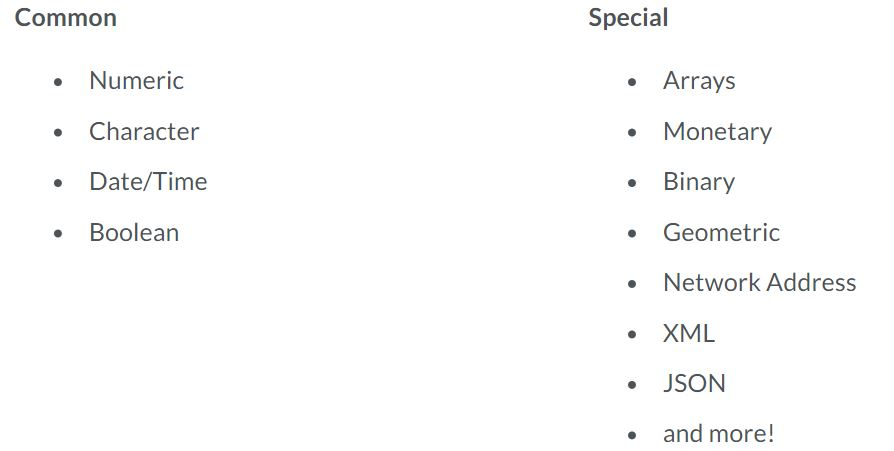

In [10]:
####

#### Reminder: Numeric types

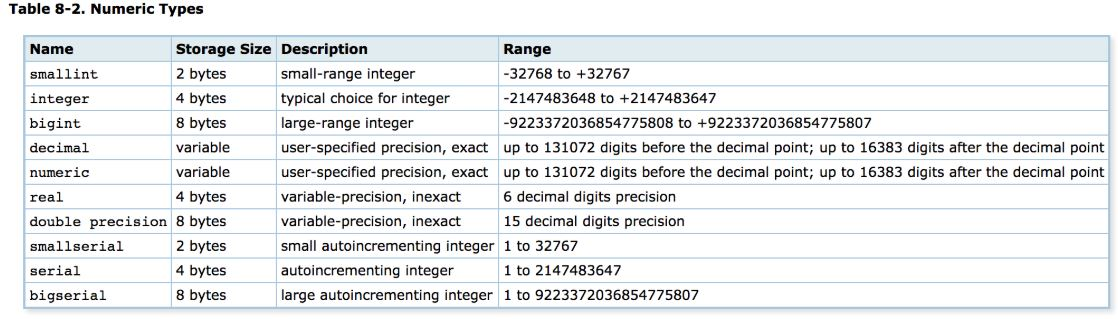

In [11]:
####

### `Types` in the entity `relationship diagrams`

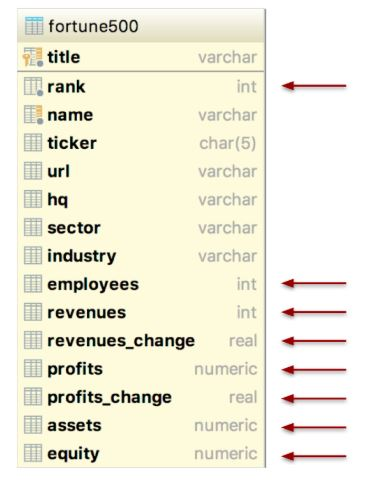

In [12]:
####

### Casting with `CAST`.

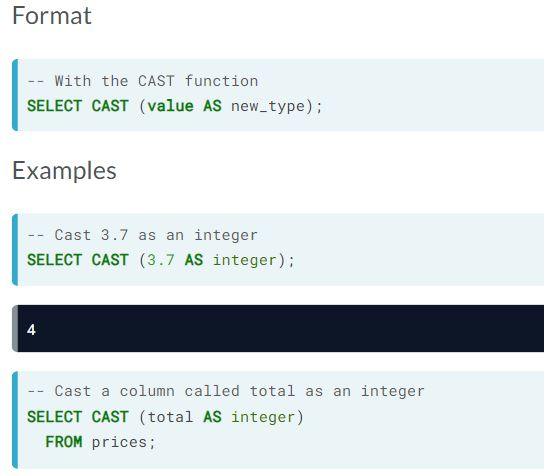

In [13]:
####

### `Casting` with `::`

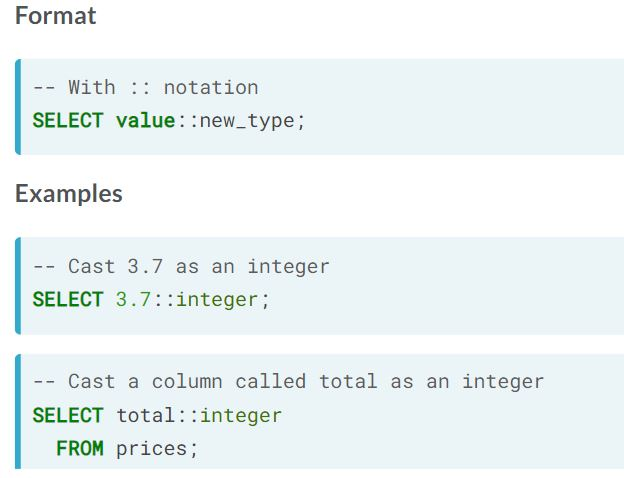

In [14]:
####

### EXERCISEs.
#### Exercise 3.1. Effects of casting
$\qquad$ When you `cast data` from one `type` to another, *`information can be lost or changed`*. 

$\qquad$ See how the `casting` changes values and practice casting data using the `CAST()` function and the `::` syntax.

                SELECT CAST(value AS new_type);

                SELECT value::new_type;
#### Instructions.
**Step 1.**
- Select `profits_change` and `profits_change` cast as `integer` from `fortune500`.
- Look at how the values were converted.

**SOLUTION.**

                -- Select the original value
                SELECT profits_change, 
                       -- Cast profits_change
                       CAST(profits_change AS integer) AS profits_change_int
                  FROM fortune500;

- **`query result`.**

profits_change|profits_change_int
:-:|:-:
-7.2|-7
0|0
-14.4|-14
-51.5|-52
53|53
20.7|21
1.5|2
-2.7|-3
-2.8|-3
-37.7|-38
...|...
25|-25
null|null
null|null
5.2|5
4.2|4
7|7
-81.3|-81
-4|-4
6.1|6
962.5|962

**Step 2.** Compare the results of casting of dividing the `integer` value 10 by 3 to the result of dividing the `numeric` value 10 by 3.

**SOLUTION.**

                    SELECT 10/3 AS without_cast, -- Divide 10 by 3 
                           10::numeric/3 AS use_cast;  -- Cast 10 as numeric and divide by 3
- **`query result`.**

without_cast | use_cast
:-:|:-:
3 | 3.3333333333333333

**Step 3.**
- Now `cast` numbers that appear as `text` as `numeric`.
- Note: `1e3` is scientific notation $10^{3}$.

**SOLUTION.**

                SELECT '3.2'::numeric,
                       '-123'::numeric,
                       '1e3'::numeric,
                       '1e-3'::numeric,
                       '02314'::numeric,
                       '0002'::numeric;

- **`query result`.**

numeric|numeric|numeric|numeric|numeric|numeric
:-:|:-:|:-:|:-:|:-:|:-:
3.2|-123|1000|0.001|2314|2

- **Comments.** Note that `numbers` `cast` as `integer` are **rounded to the nearest whole number** and `division` **produces different results for `integer` values `than` for `numeric` values.**

#### Exercise 3.2. Summarize the distribution of numeric values
$\qquad$ Was 2017 a good or bad year for revenue of `Fortune 500 companies`? 

$\qquad$ Examine how `revenue` changed from `2016` to `2017` by first looking at the distribution of `revenues_change` and then counting companies whose revenue increased.

#### Instructions.
**Step 1.**
- Use `GROUP BY` and `count()` to examine the values of `revenues_change`.
- Order the results by `revenues_change` to see the distribution.

**SOLUTION.**

                    -- Select the count of each value of revenues_change
                    SELECT revenues_change, COUNT(*)
                    FROM fortune500
                    GROUP BY revenues_change
                    ORDER BY revenues_change;
- **`query result`.**

revenues_change|count
:-:|:-:
-57.5|1
-53.3|1
-51.4|1
-50.9|1
-45|1
...|...
92.6|1
94.5|1
115.9|1
122.1|1
197.3|1


**Step 2.** Repeat `step 1`, but this time, cast `revenues_change` as an `integer` to reduce the number of `different values`.

**SOLUTION.**

                    -- Select the count of each revenues_change integer value
                    SELECT revenues_change::integer, COUNT(*)
                    FROM fortune500
                    GROUP BY revenues_change::integer
                    ORDER BY revenues_change;

- **`query results`.**

revenues_change|count
:-:|:-:
-58|1
-53|1
-51|2
-45|1
-42|1
-39|1
-38|2
-33|1
-30|1
-27|1
-23|1
-21|2
-20|5
-18|4
-17|3
-16|1
-15|3
-14|4
-13|3
-12|6
-11|11
-10|8
-9|7
-8|11
-7|9
-6|17
-5|10
-4|17
-3|15
-2|20
-1|21
0|25
1|19
2|41
3|25
4|24
5|17
6|25
7|11
8|13
9|11
10|7
11|7
12|13
13|5
14|4
15|2
16|5
17|3
18|6
19|1
20|3
21|5
22|1
23|1
24|1
25|1
26|3
27|3
28|2
29|1
30|2
32|1
33|1
34|1
37|1
38|2
40|1
42|1
44|1
46|1
48|1
54|1
60|1
73|1
79|2
83|1
92|1
93|1
94|1
116|1
122|1
197|1

**Step 3.** How many of the Fortune 500 companies had `revenues` increase in 2017 compared to 2016? To find out, count the rows of `fortune500` where `revenues_change` indicates an increase.

**SOLUTION.**

                    SELECT COUNT(*)
                    FROM fortune500
                    WHERE revenues_change > 0;
- **`query result`.**

| count |
|:-:|
| 298 |

- **Comments** `Examining distributions` and `counting observations` of interest are **two first steps** in **`exploring data`**. In the next chapter, we'll learn `other functions` and `approaches` for **summarizing `numeric data`**.